In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [59]:
n = 21
x = np.linspace(0, 20, n)
w = np.array([-1.5, 1.0 / 9])
y = w[0] * x + w[1] * x ** 2 + stats.norm.rvs(size = n) * 2

In [89]:
def recursive_mean(n, x, xbar):
    return x if n == 0 else (xbar + (x - xbar) / (n + 1.0))

def recursive_cxx(n, x, xbar, xbar_next, cxx):
    if n == 0:
        return 0
    else:
        return (x ** 2 + n * cxx + n * xbar ** 2 - (n + 1) * xbar_next ** 2) / (n + 1.0)

def recursive_cxy(n, x, xbar, xbar_next, y, ybar, ybar_next, cxy):
    if n == 0:
        return 0
    else:
        return (x * y + n * cxy + n * xbar * ybar - (n + 1) * xbar_next * ybar_next) / (n + 1.0)
    
def regress(n, xbar, ybar, cxx, cxy, x, y):    
    xbar_next = recursive_mean(n, x, xbar)
    ybar_next = recursive_mean(n, y, ybar)
    cxx = recursive_cxx(n, x, xbar, xbar_next, cxx)
    cxy = recursive_cxy(n, x, xbar, xbar_next, y, ybar, ybar_next, cxy)
    xbar = xbar_next
    ybar = ybar_next
    w1 = 0 if cxx == 0 else (1.0 * cxy / cxx)
    w0 = ybar - w1 * xbar
    return w0, w1, xbar, ybar, cxx, cxy 

-1.5 0.111111111111
-7.10989145385 0.678888394922 10.0 -0.32100750463 36.6666666667 24.8925744805
-6.29266255111 0.597165504648 10.0 -0.32100750463 38.5 26.1372032045


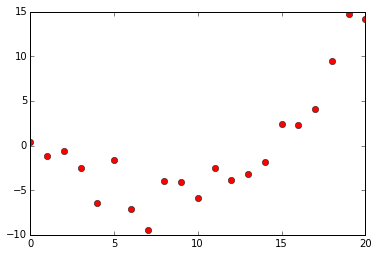

In [92]:
xbar = ybar = cxx = cxy = 'blah'

for n in range(len(x)):
    w0, w1, xbar, ybar, cxx, cxy = regress(n, xbar, ybar, cxx, cxy, x[n], y[n])

print w[0], w[1]
print w0, w1, xbar, ybar, cxx, cxy

xbar = np.mean(x)
ybar = np.mean(y)
cxx = 1.0 * sum((x - xbar) ** 2) / n
cxy = 1.0 * sum((x - xbar) * (y - ybar) ) / n
w1 = (1.0 * sum(x * y) - n * xbar * ybar) / (sum(x ** 2) - n * xbar ** 2)
w0 = ybar - w1 * xbar
print w0, w1, xbar, ybar, cxx, cxy

plt.plot(x, y, 'ro')
plt.show()